# **Feature Engineering.**
El preprocesamiento de datos es una etapa fundamental en la construcción de cualquier modelo de predicción. En este notebook, aplicaremos técnicas para **transformar y preparar** el dataset antes de su uso en el modelado.

Dado que en el análisis exploratorio del notebook anterior, identificamos la presencia d**e variables categóricas, creación de nuevas características y selección de características reelvantes para el modelo.**

Al finalizar este proceso, guardaremos un **dataset limpio** en `data/processed/`, que servirá como insumo en la siguiente fase de modelado.

## **Importación de librerías.**
Se cargan las librerías necesarias (incluidas en el archivo `requirements.txt`) para trabajar con manipulación de datos y archivos.

In [478]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt
import math
import pycountry
import pycountry_convert as pc

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

## **Importación e información de Dataframes.**

In [479]:
df = pd.read_csv('../data/cleaned/MONGO00_All_v1.csv', index_col=0)
df.head()

,glucosa,colesterol,trigliceridos,hemoglobina,leucocitos,plaquetas,creatinina,diabetes,hipertension,obesidad,cancer,enfermedad_cardiaca,asma,epoc,mut_BRCA1,mut_TP53,mut_EGFR,mut_KRAS,mut_PIK3CA,mut_ALK,mut_BRAF,ingresos_mensuales,gastos_salud,seguro_salud,deudas,tipo_empleo,ayudas_publicas,fumador,alcohol,actividad_fisica,vive,edad,sexo,estado_civil,nivel_educativo,ocupacion,region,pais_nacimiento,codigo_postal
paciente_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P1000000,108.81,226.16,161.07,13.24,6.12,258.09,0.97,1,1,1,0,1,0,0,0,0,0,0,0,0,1,2699.72,450,1,0,Público,1,1,1,Baja,1,69,F,Viudo,Secundaria,Empleado,Centro,Indonesia,98471
P1000001,74.23,148.89,110.77,13.68,6.97,278.32,0.85,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3403.55,150,1,0,Temporal,1,0,1,Moderada,0,32,M,Soltero,Universitaria,Autónomo,Sur,Brazil,23903
P1000002,88.61,177.53,91.93,12.76,7.54,245.35,1.59,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2422.41,150,1,0,Desempleado,1,1,1,Baja,1,89,M,Viudo,Primaria,Desempleado,Norte,Saint Pierre and Miquelon,20094
P1000003,90.92,203.97,121.79,12.95,8.56,245.11,1.26,1,0,1,1,1,0,0,0,0,0,1,0,0,0,1695.42,450,1,0,Temporal,1,1,1,Baja,0,78,M,Viudo,Secundaria,Autónomo,Centro,Indonesia,55575
P1000004,69.17,154.33,78.34,12.34,8.20,234.44,0.88,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1709.51,150,1,0,Temporal,1,1,1,Moderada,1,38,F,Soltero,Posgrado,Autónomo,Norte,Chile,20826


In [480]:
df.shape

(50000, 39)

In [481]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, P1000000 to P1049999
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   glucosa              50000 non-null  float64
 1   colesterol           50000 non-null  float64
 2   trigliceridos        50000 non-null  float64
 3   hemoglobina          50000 non-null  float64
 4   leucocitos           50000 non-null  float64
 5   plaquetas            50000 non-null  float64
 6   creatinina           50000 non-null  float64
 7   diabetes             50000 non-null  int64  
 8   hipertension         50000 non-null  int64  
 9   obesidad             50000 non-null  int64  
 10  cancer               50000 non-null  int64  
 11  enfermedad_cardiaca  50000 non-null  int64  
 12  asma                 50000 non-null  int64  
 13  epoc                 50000 non-null  int64  
 14  mut_BRCA1            50000 non-null  int64  
 15  mut_TP53             50000 non-

In [482]:
df.columns

Index(['glucosa', 'colesterol', 'trigliceridos', 'hemoglobina', 'leucocitos', 'plaquetas', 'creatinina', 'diabetes', 'hipertension', 'obesidad', 'cancer', 'enfermedad_cardiaca', 'asma', 'epoc', 'mut_BRCA1', 'mut_TP53', 'mut_EGFR', 'mut_KRAS', 'mut_PIK3CA', 'mut_ALK', 'mut_BRAF', 'ingresos_mensuales', 'gastos_salud', 'seguro_salud', 'deudas', 'tipo_empleo', 'ayudas_publicas', 'fumador', 'alcohol', 'actividad_fisica', 'vive', 'edad', 'sexo', 'estado_civil', 'nivel_educativo', 'ocupacion', 'region', 'pais_nacimiento', 'codigo_postal'], dtype='object')

El presente modelo de red neuronal tiene como objetivo **predecir la probabilidad de supervivencia** de un paciente (`vive = 1`) en base a un conjunto heterogéneo de variables clínicas, genéticas, socioeconómicas y demográficas. Cada grupo de variables aporta información complementaria que puede ser determinante para identificar patrones de riesgo. A continuación se describe el propósito específico de cada conjunto de variables dentro del modelo:
1. **Variables bioquímicas:** Estas variables reflejan el estado fisiológico y metabólico del paciente en el momento del análisis. Son esenciales para evaluar alteraciones funcionales que pueden estar asociadas a condiciones críticas.
    - `glucosa`, `colesterol`, `trigliceridos`: indicadores metabólicos relacionados con riesgo cardiovascular y complicaciones sistémicas.
    - `hemoglobina`, `leucocitos`, `plaquetas`: marcadores hematológicos clave para detectar anemia, infecciones o problemas inmunológicos.
    - `creatinina`: medida de función renal, importante en pacientes crónicos o polimedicados.

    Estas variables deben ser tratadas como **predictoras continuas**, y **normalizadas** antes de introducirse en la red.

2. **Variables clínicas:** Incluyen antecedentes y diagnósticos médicos relevantes, que afectan directamente al pronóstico del paciente.
    - `diabetes`, `hipertension`, `obesidad`, `cancer`, `enfermedad_cardiaca`, `asma`, `epoc`: condiciones clínicas codificadas como binarias (presente/no presente), que influyen significativamente en el riesgo de mortalidad.

    Estas variables actuarán como **factores de riesgo explícitos**, directamente introducibles en el modelo como **variables categóricas binarias**.

3. **Variables genéticas:** Representan la presencia de mutaciones en genes asociados a riesgo oncológico o enfermedades crónicas.
    - `mut_BRCA1`, `mut_TP53`, `mut_EGFR`, `mut_KRAS`, `mut_PIK3CA`, `mut_ALK`, `mut_BRAF`: presencia/ausencia de mutaciones genéticas, todas de tipo binario.

    Se usarán como **indicadores moleculares de susceptibilidad o agresividad clínica**.

4. **Variables socioeconómicas:** Estas variables permiten modelar el **contexto económico del paciente**, lo cual puede condicionar el acceso a cuidados, adherencia al tratamiento o exposición a factores de riesgo.
    - `ingresos_mensuales`: nivel de ingresos del hogar (requiere limpieza y transformación numérica).
    - `gastos_salud`, `deudas`: nivel de carga económica en salud o endeudamiento.
    - `seguro_salud`, `ayudas_publicas`: cobertura de necesidades básicas y acceso a servicios.
    - `tipo_empleo`: nivel de estabilidad laboral o exposición laboral (requiere codificación categórica).

    Estas variables se utilizarán para enriquecer el modelo con información **social y financiera**, relevante en medicina personalizada.

5. **Variables de estilo de vida:** Influyen directamente en el pronóstico, ya que reflejan **conductas de riesgo o factores protectores**.
    - `fumador`, `alcohol`: consumo de sustancias nocivas.
    - `actividad_fisica`: nivel de movilidad o ejercicio, que puede tener un efecto protector.

    Estas variables se integrarán como **predictoras categóricas discretas**, especialmente útiles para ajustar perfiles de riesgo.

6. **Variable objetivo**
    - `vive`: variable binaria que indica si el paciente ha sobrevivido tras un periodo crítico. Esta es la **variable objetivo del modelo** y se utilizará para entrenamiento supervisado.

7. **Variables demográficas y contexto:** Estas variables permiten contextualizar al paciente dentro de su entorno social y cultural, lo que puede afectar directa o indirectamente a su salud.
    - `edad`: variable continua de alta relevancia clínica.
    - `sexo`, `estado_civil`, `nivel_educativo`, `ocupacion`, `region`, `pais_nacimiento`, `codigo_postal`: variables categóricas con posible relación con factores estructurales de salud y mortalidad.

    Se incorporarán al modelo con el objetivo de **detectar patrones diferenciales por perfil poblacional**.



In [483]:
df.head(3)

,glucosa,colesterol,trigliceridos,hemoglobina,leucocitos,plaquetas,creatinina,diabetes,hipertension,obesidad,cancer,enfermedad_cardiaca,asma,epoc,mut_BRCA1,mut_TP53,mut_EGFR,mut_KRAS,mut_PIK3CA,mut_ALK,mut_BRAF,ingresos_mensuales,gastos_salud,seguro_salud,deudas,tipo_empleo,ayudas_publicas,fumador,alcohol,actividad_fisica,vive,edad,sexo,estado_civil,nivel_educativo,ocupacion,region,pais_nacimiento,codigo_postal
paciente_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P1000000,108.81,226.16,161.07,13.24,6.12,258.09,0.97,1,1,1,0,1,0,0,0,0,0,0,0,0,1,2699.72,450,1,0,Público,1,1,1,Baja,1,69,F,Viudo,Secundaria,Empleado,Centro,Indonesia,98471
P1000001,74.23,148.89,110.77,13.68,6.97,278.32,0.85,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3403.55,150,1,0,Temporal,1,0,1,Moderada,0,32,M,Soltero,Universitaria,Autónomo,Sur,Brazil,23903
P1000002,88.61,177.53,91.93,12.76,7.54,245.35,1.59,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2422.41,150,1,0,Desempleado,1,1,1,Baja,1,89,M,Viudo,Primaria,Desempleado,Norte,Saint Pierre and Miquelon,20094


## **Selección de variables categóricas y continuas.**
Para realizar correctamente un ánalisis de datos debemos de distinguir entre las variables categóricas, variables que representan diferentes categorías o grupos, y continuas, variables que pueden tomar cualquier valor dentro de un rango determinado.

In [484]:
v_continuas = []
v_categoricas = []
v_binarias = []
for i in df.columns:
    if df[i].nunique() > 55 and df[i].dtypes in ['float64', 'int64']:
        v_continuas.append(i)
    elif df[i].nunique() <= 2:
        v_binarias.append(i)
    else:
        v_categoricas.append(i)

print('Variables continuas: {}'.format(', '.join(v_continuas)))
print('Variables binarias: {}'.format(', '.join(v_binarias)))
print('Variables categóricas: {}'.format(', '.join(v_categoricas)))

Variables continuas: glucosa, colesterol, trigliceridos, hemoglobina, leucocitos, plaquetas, creatinina, ingresos_mensuales, edad, codigo_postal
Variables binarias: diabetes, hipertension, obesidad, cancer, enfermedad_cardiaca, asma, epoc, mut_BRCA1, mut_TP53, mut_EGFR, mut_KRAS, mut_PIK3CA, mut_ALK, mut_BRAF, seguro_salud, deudas, ayudas_publicas, fumador, alcohol, vive, sexo
Variables categóricas: gastos_salud, tipo_empleo, actividad_fisica, estado_civil, nivel_educativo, ocupacion, region, pais_nacimiento


### **Tratamiento de variables categóricas.**
Para el posterior modelo de red neuronal, necesitamos codificar nuestras variables. Para ello, realizaremos una codificación ordinal que consiste en asignar valores enteros a las categorias basándose en su posición o jerarquía en los datos.

In [485]:
df[v_categoricas].head(3)

,gastos_salud,tipo_empleo,actividad_fisica,estado_civil,nivel_educativo,ocupacion,region,pais_nacimiento
paciente_id,,,,,,,,
P1000000,450,Público,Baja,Viudo,Secundaria,Empleado,Centro,Indonesia
P1000001,150,Temporal,Moderada,Soltero,Universitaria,Autónomo,Sur,Brazil
P1000002,150,Desempleado,Baja,Viudo,Primaria,Desempleado,Norte,Saint Pierre and Miquelon


In [486]:
df[v_categoricas].nunique()

gastos_salud          5
tipo_empleo           5
actividad_fisica      3
estado_civil          4
nivel_educativo       4
ocupacion             4
region                5
pais_nacimiento     243
dtype: int64

In [487]:
df[v_categoricas].describe(include='all')

,gastos_salud,tipo_empleo,actividad_fisica,estado_civil,nivel_educativo,ocupacion,region,pais_nacimiento
count,50000.000000,50000,50000,50000,50000,50000,50000,50000
unique,NaN,5,3,4,4,4,5,243
top,NaN,Desempleado,Moderada,Casado,Secundaria,Jubilado,Centro,Congo
freq,NaN,10065,20821,12628,12638,12568,10094,439
mean,228.762000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,88.941023,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,150.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,150.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,250.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,250.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Antes de proceder con la codificación de las variables categóricas, es fundamental realizar una revisión de los valores únicos presentes en cada una de ellas. Este paso nos permite identificar posibles inconsistencias en los datos, como errores de escritura, diferencias en el formato o valores no esperados, que podrían afectar la calidad del modelo.

Al analizar los valores únicos, podremos detectar y corregir errores, agrupar categorías similares si es necesario y definir la estrategia de codificación más adecuada. Una vez verificada la coherencia de los datos, aplicaremos **OrdinalEncoder** o **LabelEncoder** según corresponda, asegurando que las variables estén en el formato adecuado para su uso en el modelo predictivo.

In [488]:
print('Valores únicos de las variables categóricas:')
for col in v_categoricas:
    print(f"- {col}: {df[col].unique()}")

Valores únicos de las variables categóricas:
- gastos_salud: [450 150 250 350 550]
- tipo_empleo: ['Público' 'Temporal' 'Desempleado' 'Privado' 'Autónomo']
- actividad_fisica: ['Baja' 'Moderada' 'Alta']
- estado_civil: ['Viudo' 'Soltero' 'Divorciado' 'Casado']
- nivel_educativo: ['Secundaria' 'Universitaria' 'Primaria' 'Posgrado']
- ocupacion: ['Empleado' 'Autónomo' 'Desempleado' 'Jubilado']
- region: ['Centro' 'Sur' 'Norte' 'Oeste' 'Este']
- pais_nacimiento: ['Indonesia' 'Brazil' 'Saint Pierre and Miquelon' 'Chile' 'Cuba'
 'American Samoa' 'Montenegro' 'Cameroon' 'Barbados' 'Slovenia'
 'Greenland' 'China' 'Somalia' 'Senegal' 'Korea' 'Palau' 'Swaziland'
 'Antigua and Barbuda' 'Holy See (Vatican City State)' 'Netherlands'
 'Equatorial Guinea' 'Samoa' 'Montserrat' 'San Marino' 'Cayman Islands'
 'Malta' 'Tuvalu' 'Benin' 'United States of America' 'Bahamas'
 'Cape Verde' 'Kazakhstan' 'French Guiana' 'Switzerland' "Cote d'Ivoire"
 'Azerbaijan' 'Timor-Leste' 'Gibraltar' 'Vanuatu' 'Malawi'
 '

Para preparar las variables categóricas de cara al entrenamiento de una red neuronal, se propone el siguiente tratamiento:

**1. Codificación ordinal**: aquellas variables con un orden lógico se transformarán mediante mapeos numéricos personalizados. Esto aplica a:

- `actividad_fisica`, que se codificará como `Baja < Moderada < Alta`.
- `nivel_educativo`, codificada como `Primaria < Secundaria < Universitaria < Posgrado`.

**2. Codificación One-Hot**: se aplicará a variables nominales sin orden, con un número de categorías moderado. Se utilizará `get_dummies` para evitar colinealidad. Esta técnica se aplicará a:

- `tipo_empleo` (5 categorías),
- `estado_civil` (4 categorías),
- `ocupacion` (4 categorías),
- `region` (5 categorías).

**3. Agrupación + One-Hot**: para variables con alta cardinalidad.

- `pais_nacimiento` contiene más de 150 países, por lo que se agrupará en por continentes.
- `codigo_postal` debemos de evaluar si conservarla o no.

**4. Variables numéricas no transformadas**: `gastos_salud` será tratada como variable numérica ordinal (pese a tener valores repetidos fijos como 150, 250…), y no requiere codificación adicional, solo normalización.

#### **Agrupación de valores.**
En modelos de **Machine Learning**, las **variables categóricas** juegan un papel clave en la generación de patrones de comportamiento. Sin embargo, cuando estas variables tienen un número elevado de categorías o algunas de ellas tienen poca representatividad, puede ser necesario **agruparlas** para mejorar la eficiencia del modelo sin perder información relevante. La agrupación de variables categóricas es útil para: **reducción de la dimensionalidad** del modelo (riesgo de sobreajuste); evitar **problemas de baja representación**, variables con muy pocos registros, lo que hace difícil que el modelo aprenda patrones confiables sobre ellas; **mejora de la estabilidad del modelo**, unificar categorías con características similares ;** optimización del rendimiento del modelo**, si dos o más categorías tienen un comportamiento similar respecto a la variable objetivo, fusionarlas simplifica la estructura del modelo sin perder información.

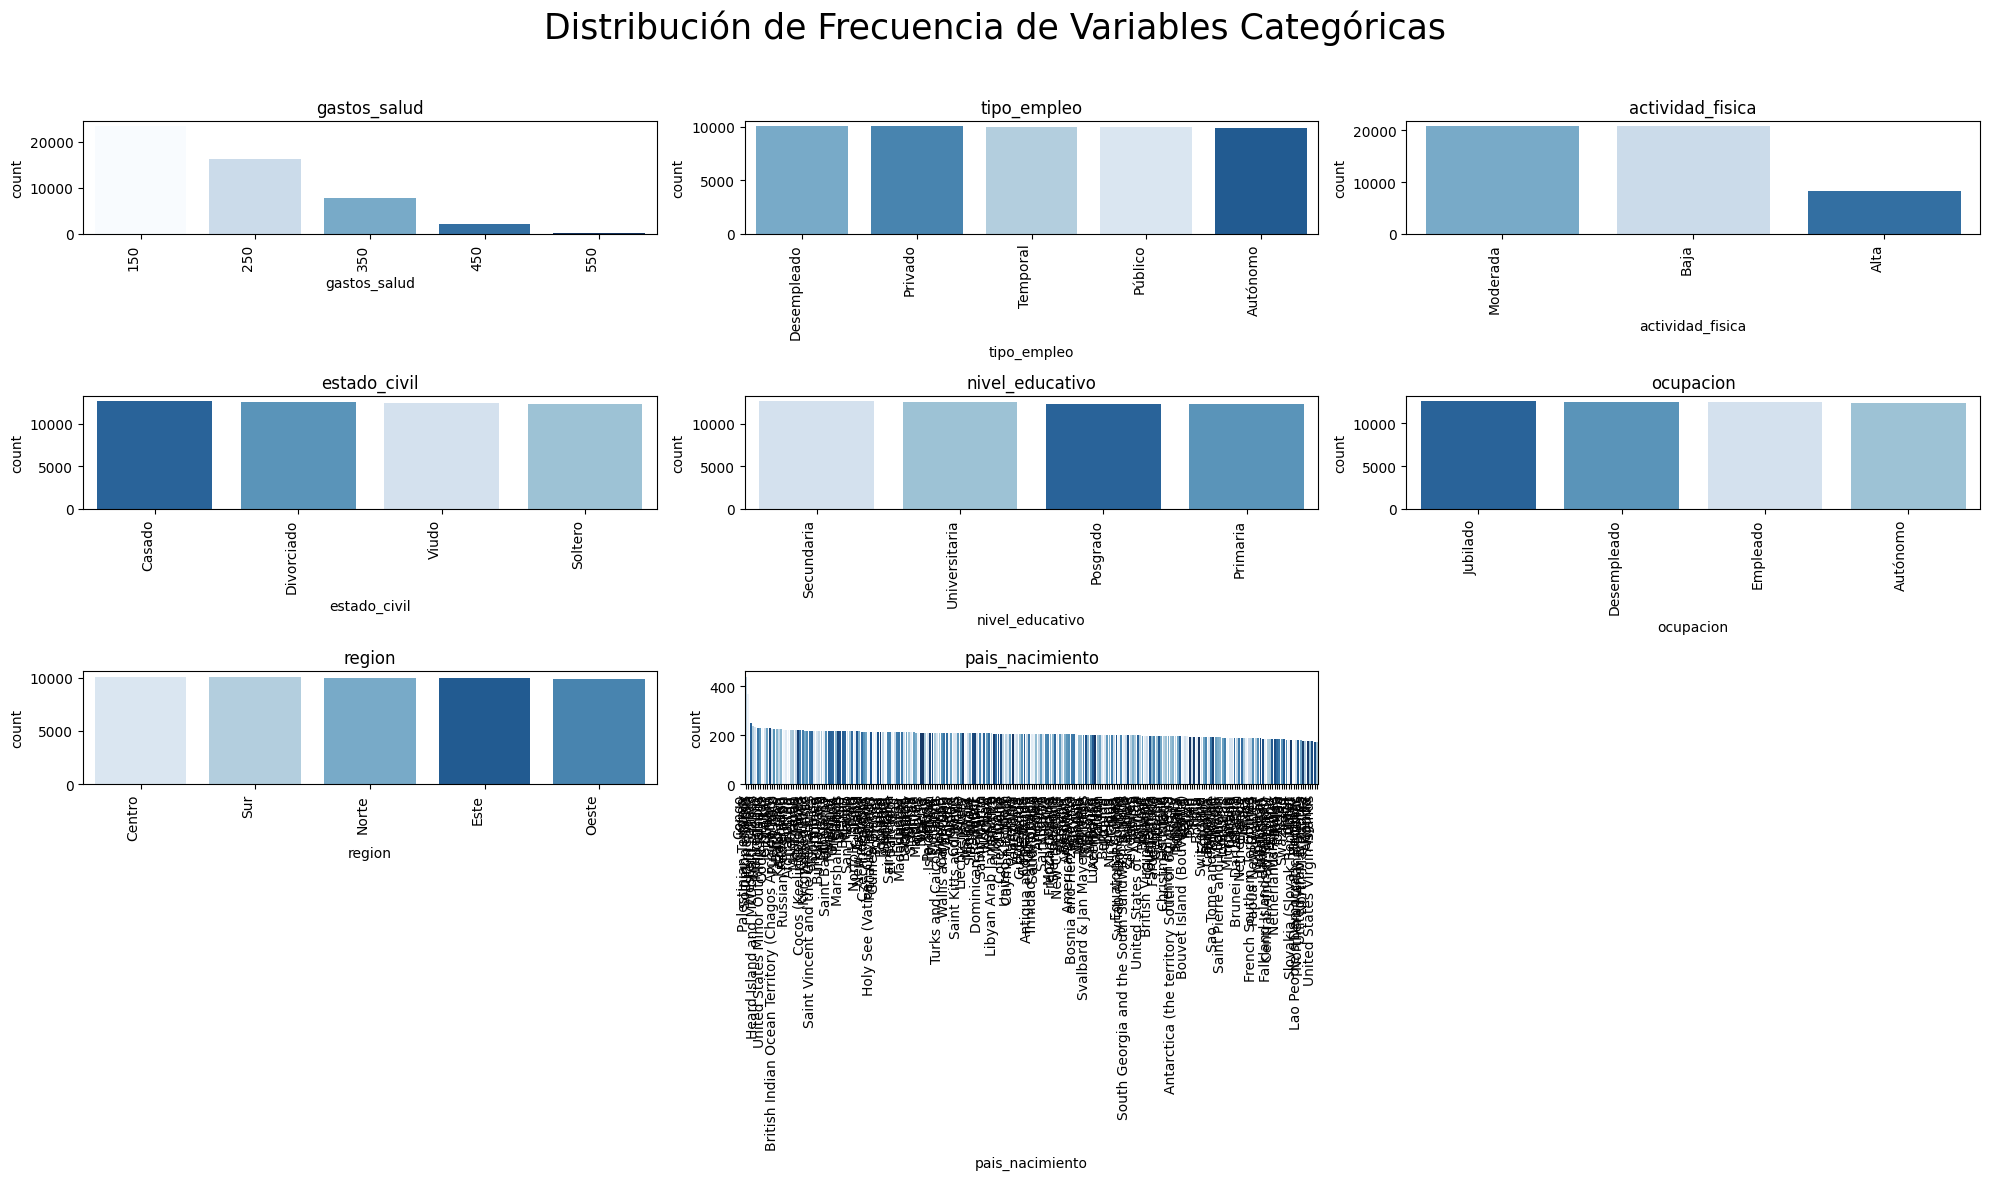

In [489]:
# Tamaño de la figura y la cantidad de filas/columnas.
num_vars = len(v_categoricas)
rows = (num_vars // 3) + (num_vars % 3 > 0)
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(20, rows * 4))  # Ajuste automático.
fig.suptitle("Distribución de Frecuencia de Variables Categóricas", fontsize=25)
axes = axes.flatten()

# Graficación de cada categoría.
for i, col in enumerate([col for col in v_categoricas if df[col].nunique() > 2]):
    sns.countplot(data=df, x=col, ax=axes[i], hue=col, legend=False, order=df[col].value_counts().index, palette="Blues")
    axes[i].set_title(col)
    axes[i].set_xticks(range(len(df[col].value_counts().index)))
    axes[i].set_xticklabels(df[col].value_counts().index, rotation=90, ha="right")

# Ocultar ejes vacíos si hay menos variables que espacios en el grid.
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

##### **Pais Nacimiento.**
La variable `pais_nacimiento` contiene más de 150 categorías únicas, lo que representa un problema de **alta cardinalidad** si se codifica directamente mediante técnicas como one-hot encoding. Este nivel de granularidad puede provocar una **explosión del espacio de características**, aumentar el riesgo de sobreajuste y reducir la interpretabilidad del modelo.

Para mitigar estos efectos, se ha optado por **agrupar los países en macrocategorías relevantes para el contexto del dataset**. Esta clasificación permite conservar la información geopolítica esencial, relacionada con aspectos socioeconómicos, sanitarios y de acceso al sistema de salud, sin introducir ruido o complejidad innecesaria en el modelo. Una vez reagrupada, la variable se codifica mediante **one-hot encoding**, garantizando compatibilidad con modelos numéricos como redes neuronales.

In [490]:
df['pais_nacimiento'].value_counts()

pais_nacimiento
Congo                           439
Korea                           367
Palestinian Territory           249
Solomon Islands                 238
Turkmenistan                    234
                               ... 
United Arab Emirates            176
North Macedonia                 176
Uganda                          175
Anguilla                        174
United States Virgin Islands    171
Name: count, Length: 243, dtype: int64

In [491]:
manual_mapping = {'Asia': ['Korea', 'Timor-Leste', 'Palestinian Territory', 'Turkey',
                            'British Indian Ocean Territory (Chagos Archipelago)'
    ],
    'Africa': ['Swaziland', 'Cape Verde', "Cote d'Ivoire", 'Reunion', 'Saint Helena',
                'Western Sahara','Libyan Arab Jamahiriya'
    ],
    'Europe': ['Holy See (Vatican City State)', 'Slovakia (Slovak Republic)',
                'Svalbard & Jan Mayen Islands'
    ],
    'North America': ['United States Virgin Islands', 'Netherlands Antilles','Saint Martin',
                        'Saint Barthelemy'
    ],
    'Oceania': ['Micronesia', 'Pitcairn Islands', 'United States Minor Outlying Islands'
    ],
    'Antarctica': ['Antarctica (the territory South of 60 deg S)', 'French Southern Territories',
                    'Bouvet Island (Bouvetoya)'
    ]
}

In [492]:
# Invertir el diccionario para facilitar la búsqueda de continentes por país.
reverse_manual_mapping = {country: continent for continent, countries in manual_mapping.items() for country in countries}

def get_continent(country):
    if country in reverse_manual_mapping:
        return reverse_manual_mapping[country]
    try:
        country_obj = pycountry.countries.lookup(country)
        country_alpha2 = country_obj.alpha_2
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)

        continent_map = {
            'NA': 'North America',
            'SA': 'South America',
            'EU': 'Europe',
            'AS': 'Asia',
            'AF': 'Africa',
            'OC': 'Oceania',
            'AN': 'Antarctica'
        }

        return continent_map.get(continent_code, None)

    except Exception:
        return None

In [493]:
df['continente_nacimiento'] = df['pais_nacimiento'].apply(get_continent)

In [494]:
df[df['continente_nacimiento'].isnull()]['pais_nacimiento'].unique() # Valores no mapeados.

array([], dtype=object)

In [495]:
df.drop(columns=["pais_nacimiento"], inplace=True) # Eliminacuión de la variable original.

In [496]:
# Cambio de tipo de variable para las variables categóricas.
v_categoricas = [col for col in v_categoricas if col != "pais_nacimiento" and df[col].dtype != "float64"]
v_categoricas.append("continente_nacimiento")

##### **Código Postal.**
La variable `codigo_postal`, aunque inicialmente considerada como una posible fuente de información geográfica, ha sido eliminada del dataset por las siguientes razones técnicas y metodológicas:

1. **Alta cardinalidad**: contiene decenas de miles de valores únicos, lo que imposibilita su uso directo mediante técnicas convencionales de codificación categórica (como One-Hot Encoding) sin generar una matriz de entrada extremadamente dispersa y dimensionalmente costosa.

2. **Falta de estructura agregable**: a diferencia de otras variables geográficas como `region`, que están estandarizadas y permiten agrupación analítica, los códigos postales no presentan una jerarquía clara ni un criterio de agregación homogéneo en el contexto del análisis, dificultando su transformación significativa.

3. **Redundancia con variables más útiles**: su posible valor informativo está parcialmente cubierto por la variable `region`, que ofrece una representación territorial simplificada, coherente y directamente interpretable, sin necesidad de procesamientos adicionales.

4. **Riesgo de sobreajuste y ruido**: incorporar `codigo_postal` en una red neuronal implicaría introducir una gran cantidad de columnas sin evidencia clara de impacto predictivo, lo que aumentaría la complejidad del modelo y su susceptibilidad a sobreajuste.

En base a estos motivos, se considera que `codigo_postal` **no aporta valor sustancial al modelo** y su exclusión mejora la eficiencia y calidad del preprocesamiento, priorizando variables estructuradas, interpretables y con mayor potencial explicativo.

In [497]:
df.drop(columns=['codigo_postal'], inplace=True) # Eliminación de la variable código postal.
v_continuas.remove('codigo_postal')

#### **Variables con Orden Lógico (`OrdinalEncoder`).**
Las siguientes variables tienen un orden lógico en sus categorías, por lo que utilizaremos OrdinalEncoder para mantener la relación jerárquica entre ellas. Se asignan valores numéricos respetando el orden jerárquico de las categorías.

In [498]:
# Definición del orden lógico de las variables ordinales.
ordinal_cols = {
    "actividad_fisica": ["Baja", "Moderada", "Alta"],
    "nivel_educativo": ["Primaria", "Secundaria", "Universitaria", "Posgrado"]
}

In [499]:
ordinal_encoder = OrdinalEncoder(categories=[ordinal_cols[col] for col in ordinal_cols])
df[list(ordinal_cols.keys())] = ordinal_encoder.fit_transform(df[list(ordinal_cols.keys())])

#### **Variables sin Orden Específico (`One Hot Encoder`).**

In [500]:
onehot_cols = [col for col in v_categoricas
    if (df[col].dtype == 'object' or df[col].dtype.name == 'category') and col not in ordinal_cols]

In [501]:
df.shape

(50000, 38)

In [502]:
# Aplicar One-Hot Encoding sobre las variables sin orden lógico
df = pd.get_dummies(df, columns=onehot_cols, drop_first=True)
df = df.astype({col: 'int' for col in df.select_dtypes(include='bool').columns})

In [503]:
df.shape

(50000, 53)

In [504]:
df.head(3)

,glucosa,colesterol,trigliceridos,hemoglobina,leucocitos,plaquetas,creatinina,diabetes,hipertension,obesidad,cancer,enfermedad_cardiaca,asma,epoc,mut_BRCA1,mut_TP53,mut_EGFR,mut_KRAS,mut_PIK3CA,mut_ALK,mut_BRAF,ingresos_mensuales,gastos_salud,seguro_salud,deudas,ayudas_publicas,fumador,alcohol,actividad_fisica,vive,edad,sexo,nivel_educativo,tipo_empleo_Desempleado,tipo_empleo_Privado,tipo_empleo_Público,tipo_empleo_Temporal,estado_civil_Divorciado,estado_civil_Soltero,estado_civil_Viudo,ocupacion_Desempleado,ocupacion_Empleado,ocupacion_Jubilado,region_Este,region_Norte,region_Oeste,region_Sur,continente_nacimiento_Antarctica,continente_nacimiento_Asia,continente_nacimiento_Europe,continente_nacimiento_North America,continente_nacimiento_Oceania,continente_nacimiento_South America
paciente_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P1000000,108.81,226.16,161.07,13.24,6.12,258.09,0.97,1,1,1,0,1,0,0,0,0,0,0,0,0,1,2699.72,450,1,0,1,1,1,0.0,1,69,F,1.0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
P1000001,74.23,148.89,110.77,13.68,6.97,278.32,0.85,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3403.55,150,1,0,1,0,1,1.0,0,32,M,2.0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
P1000002,88.61,177.53,91.93,12.76,7.54,245.35,1.59,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2422.41,150,1,0,1,1,1,0.0,1,89,M,0.0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0


### **Tratamiento de variables continuas.**
El preprocesamiento de variables continuas es una etapa clave para mejorar la calidad del modelo y garantizar que las características numéricas aporten información relevante. En este apartado, hemos abordado distintas técnicas para optimizar estas variables y reducir posibles sesgos en el análisis.

In [505]:
df[v_continuas].head(3)

,glucosa,colesterol,trigliceridos,hemoglobina,leucocitos,plaquetas,creatinina,ingresos_mensuales,edad
paciente_id,,,,,,,,,
P1000000,108.81,226.16,161.07,13.24,6.12,258.09,0.97,2699.72,69
P1000001,74.23,148.89,110.77,13.68,6.97,278.32,0.85,3403.55,32
P1000002,88.61,177.53,91.93,12.76,7.54,245.35,1.59,2422.41,89


In [506]:
df[v_continuas].describe()

,glucosa,colesterol,trigliceridos,hemoglobina,leucocitos,plaquetas,creatinina,ingresos_mensuales,edad
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,94.256713,196.260309,147.157669,13.502815,7.053920,249.990116,1.039304,1701.924308,53.398700
std,12.925690,26.787774,26.810501,1.001045,1.010373,39.910050,0.214209,665.406504,20.799006
min,50.860000,103.280000,46.700000,9.440000,2.890000,97.030000,0.180000,300.000000,18.000000
25%,85.180000,177.260000,128.767500,12.820000,6.370000,223.180000,0.890000,1240.310000,35.000000
50%,93.160000,195.090000,147.210000,13.500000,7.050000,250.440000,1.040000,1696.680000,53.000000
75%,102.460000,214.320000,165.110000,14.180000,7.730000,276.850000,1.180000,2154.200000,71.000000
max,148.090000,297.330000,259.090000,17.800000,11.210000,418.260000,1.940000,4359.950000,89.000000


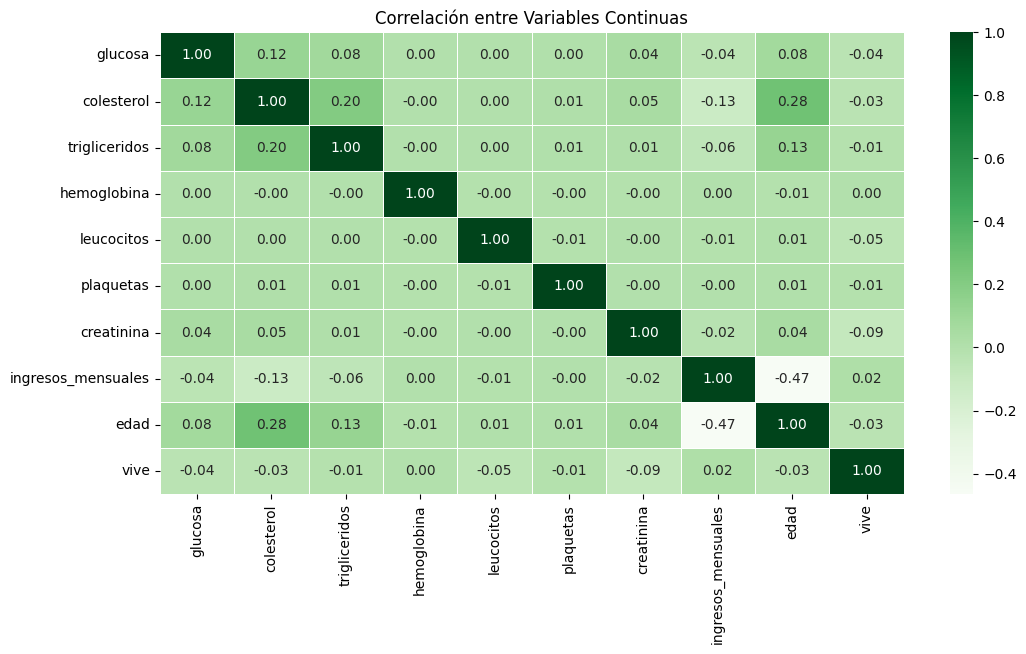

In [507]:
corr = df[v_continuas + ['vive']].corr()

plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Greens', linewidths=0.5)
plt.title("Correlación entre Variables Continuas")
plt.show()

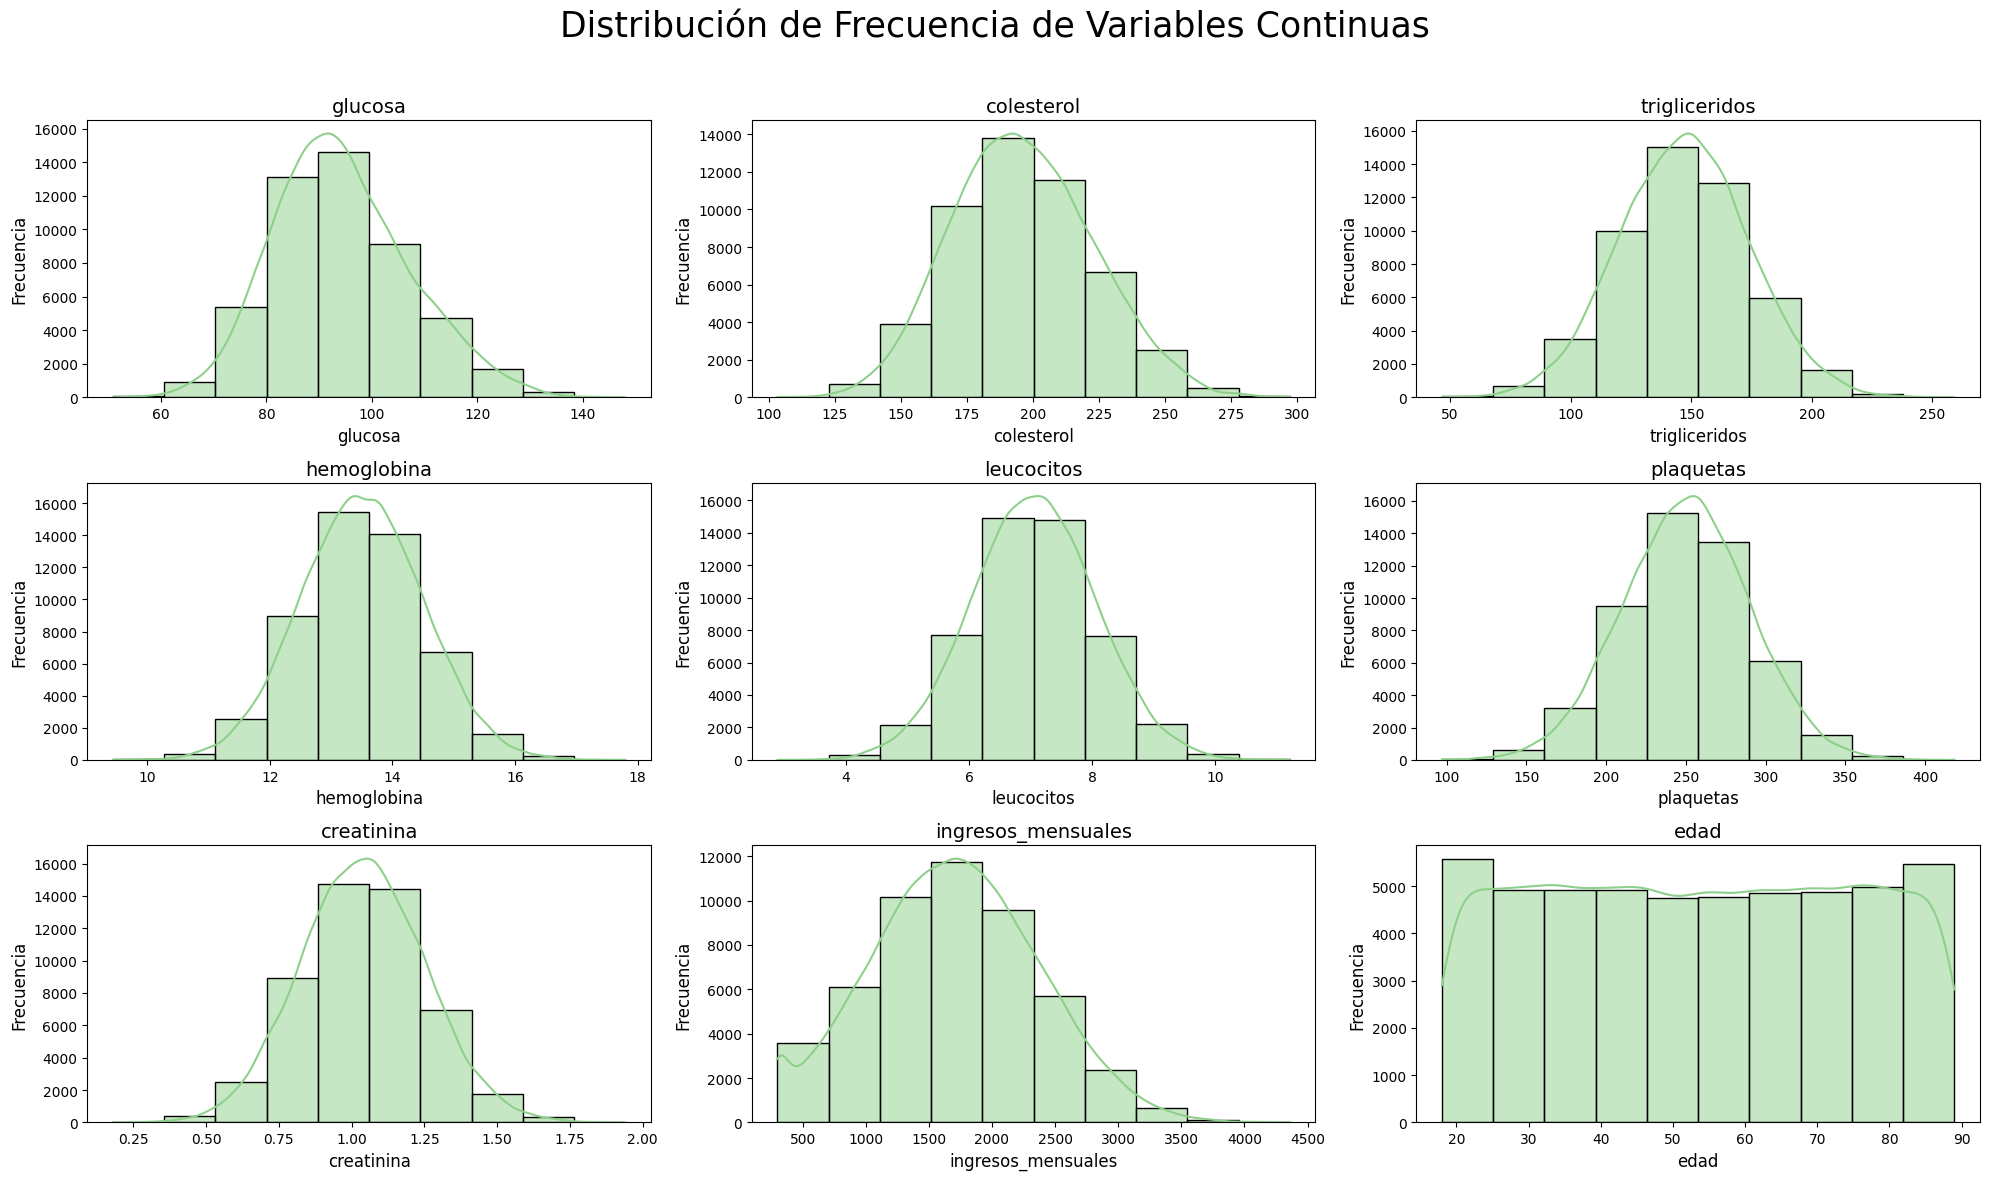

In [508]:
# Tamaño de la figura y la cantidad de filas/columnas.
num_vars = len(v_continuas)
rows = (num_vars // 3) + (num_vars % 3 > 0)
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(20, rows * 4))  # Ajuste automático.
fig.suptitle("Distribución de Frecuencia de Variables Continuas", fontsize=25)
axes = axes.flatten()

# Graficación de cada categoría.
for i, col in enumerate(v_continuas):
    sns.histplot(data=df, x=col, ax=axes[i], kde=True, bins=10, color=sns.color_palette("Greens")[2])
    axes[i].set_title(col, fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frecuencia", fontsize=12)

# Ocultar ejes vacíos si hay menos variables que espacios en el grid.
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

En el contexto del entrenamiento de modelos basados en redes neuronales, la estandarización de variables continuas es una práctica fundamental del preprocesamiento. Consiste en transformar cada variable para que tenga **media cero y desviación estándar uno**, utilizando técnicas como `StandardScaler`.

Esta transformación es necesaria por las siguientes razones:

1. **Convergencia más rápida y estable**: Las redes neuronales utilizan algoritmos de optimización como el descenso de gradiente, que funcionan mejor cuando las entradas están en rangos homogéneos. Variables en distintas escalas pueden provocar actualizaciones de pesos inestables o más lentas.

2. **Evita el dominio de variables con grandes magnitudes**: Si una variable como `ingresos_mensuales` oscila entre 300 y 4000, y otra como `creatinina` varía solo entre 0.2 y 2.0, la primera influirá mucho más en el cálculo de los gradientes, incluso aunque su valor informativo sea menor. Estandarizar corrige este desequilibrio.

3. **Mejora la eficiencia numérica**: Las funciones de activación, especialmente en redes profundas, son más eficientes y estables cuando las entradas están centradas en torno a cero. Esto reduce el riesgo de saturación en activaciones como la sigmoide o la tangente hiperbólica.

4. **Facilita la regularización**: Técnicas como dropout o weight decay se benefician de una entrada estandarizada, ya que permiten aplicar penalizaciones consistentes sin verse distorsionadas por la escala de los datos.

In [509]:
scaler = StandardScaler()
df[v_continuas] = scaler.fit_transform(df[v_continuas])

### **Tratamiento de variables binarias.**
Las variables binarias son aquellas que solo pueden tomar **dos valores posibles**, representando típicamente la presencia o ausencia de una condición, una elección dicotómica o un estado booleano. En el dataset actual, estas variables ya están codificadas en forma de enteros (`0` y `1`) o como valores booleanos (`True` / `False`), dependiendo del origen del dato y el tipo de codificación aplicada.

Para garantizar la compatibilidad con modelos como las redes neuronales, que requieren entradas numéricas, es importante asegurar que todas las variables binarias estén representadas de forma **numérica explícita** (`0` y `1`). Aunque muchas librerías modernas interpretan correctamente los valores booleanos, convertirlos a enteros permite mantener la **homogeneidad de tipos** en el DataFrame, evitar errores silenciosos y facilitar el análisis posterior (como correlaciones o escalado).

Este tratamiento se aplica de forma sencilla transformando todas las columnas de tipo booleano a tipo entero, sin alterar la semántica del dato, pero preparando adecuadamente el conjunto para su uso en modelos supervisados complejos.

In [510]:
df[v_binarias].head(3)

,diabetes,hipertension,obesidad,cancer,enfermedad_cardiaca,asma,epoc,mut_BRCA1,mut_TP53,mut_EGFR,mut_KRAS,mut_PIK3CA,mut_ALK,mut_BRAF,seguro_salud,deudas,ayudas_publicas,fumador,alcohol,vive,sexo
paciente_id,,,,,,,,,,,,,,,,,,,,,
P1000000,1,1,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,F
P1000001,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,M
P1000002,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,1,1,M


In [511]:
df[v_binarias].nunique() # Valores únicos de las variables binarias.

diabetes               2
hipertension           2
obesidad               2
cancer                 2
enfermedad_cardiaca    2
asma                   1
epoc                   2
mut_BRCA1              2
mut_TP53               2
mut_EGFR               2
mut_KRAS               2
mut_PIK3CA             2
mut_ALK                2
mut_BRAF               2
seguro_salud           1
deudas                 2
ayudas_publicas        1
fumador                2
alcohol                1
vive                   2
sexo                   2
dtype: int64

Las **variables con una sola categoría** no aportan ninguna información discriminativa al modelo y, por tanto, **deben ser eliminadas** del conjunto de entrenamiento. Las demás se conservarán, asegurando que estén codificadas como valores numéricos (0 y 1) mediante conversión explícita si es necesario.

In [512]:
# Detectar columnas binarias sin variabilidad (solo un valor único).
binarias_sin_var = [col for col in v_binarias if df[col].nunique() == 1]
print(f"Columnas binarias sin variabilidad: {binarias_sin_var}")
df.drop(columns=binarias_sin_var, inplace=True)

Columnas binarias sin variabilidad: ['asma', 'seguro_salud', 'ayudas_publicas', 'alcohol']


In [513]:
# Actualizar la lista de variables binarias después de eliminar las columnas sin variabilidad.
v_binarias = [col for col in v_binarias if col not in binarias_sin_var]

In [514]:
df[v_binarias].dtypes

diabetes                int64
hipertension            int64
obesidad                int64
cancer                  int64
enfermedad_cardiaca     int64
epoc                    int64
mut_BRCA1               int64
mut_TP53                int64
mut_EGFR                int64
mut_KRAS                int64
mut_PIK3CA              int64
mut_ALK                 int64
mut_BRAF                int64
deudas                  int64
fumador                 int64
vive                    int64
sexo                   object
dtype: object

In [515]:
df['sexo'] = df['sexo'].map({'F': 0, 'M': 1}).astype(int)

## **Exportación del Dataset Final.**
Tras completar el preprocesamiento de los datos, es necesario guardar el dataset limpio y transformado para su uso en las redes neuronales. En esta etapa, aseguramos que todas las variables estén correctamente codificadas, sin valores nulos ni atípicos, y listas para ser utilizadas en el entrenamiento del modelo. Exportaremos el dataset en **formato CSV** para facilitar su integración con los algoritmos de clasificación, asegurando que los datos sean accesibles de manera eficiente en futuras etapas del análisis.

In [516]:
df.to_csv('../data/processed/MONGO00_All_v1.csv', index=True)